<a href="https://colab.research.google.com/github/torrhen/pytorch/blob/main/03_pytorch_computer_vision_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [46]:
# Check for GPU
!nvidia-smi

Fri Dec  9 16:00:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    26W /  70W |   1136MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [47]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

1.13.0+cu116


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [48]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# download MNIST training and test data
train_data = MNIST(root='data', train=True, download=True, transform=ToTensor(), target_transform=None)
test_data = MNIST(root='data', train=False, download=True, transform=ToTensor(), target_transform=None)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

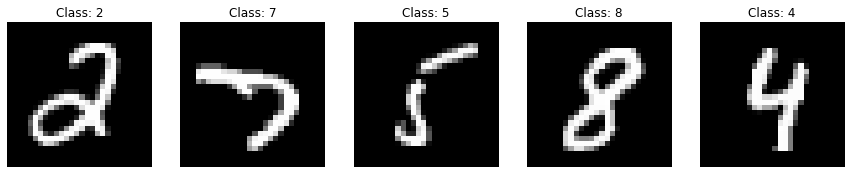

In [49]:
import random
import matplotlib.pyplot as plt

torch.manual_seed(42)
N_SAMPLES = 5
# select 5 random indexes from the training data
random_idx = random.sample(range(len(train_data)), k=N_SAMPLES)

fig = plt.figure(figsize=(15, 3))
# plot the image and label from the training data at each random index from the list above
for i, rand_idx in enumerate(random_idx):
  image, label = train_data[rand_idx][0].squeeze(dim=0), train_data[rand_idx][1]
  fig.add_subplot(1, 5, i+1)
  plt.imshow(image, cmap='gray')
  plt.title(f"Class: {label}")
  plt.axis(False)



## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [50]:
from torch.utils.data import DataLoader

torch.manual_seed(42)
# load training and test data into data loaders, shuffle and divide into batches
BATCH_SIZE = 32
train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=test_data, shuffle=False, batch_size=BATCH_SIZE)

print(f"{len(train_loader)} batches for a total of {len(train_data)} samples in the training data.")
print(f"{len(test_loader)} batches for a total of {len(test_data)} samples in the test data.")

1875 batches for a total of 60000 samples in the training data.
313 batches for a total of 10000 samples in the test data.


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [51]:
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*7*7, out_features=10)
    )

  def forward(self, x):
    return self.fc(self.block2(self.block1(x)))

In [52]:
model2 = TinyVGG().to(device)

In [53]:
!pip install torchinfo

from torchinfo import summary

summary(model2, (1, 1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 14, 14]           --
│    └─Conv2d: 2-1                       [1, 10, 28, 28]           100
│    └─ReLU: 2-2                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-3                       [1, 10, 28, 28]           910
│    └─ReLU: 2-4                         [1, 10, 28, 28]           --
│    └─MaxPool2d: 2-5                    [1, 10, 14, 14]           --
├─Sequential: 1-2                        [1, 10, 7, 7]             --
│    └─Conv2d: 2-6                       [1, 10, 14, 14]           910
│    └─ReLU: 2-7                         [1, 10, 14, 14]           --
│    └─Conv2d: 2-8                       [1, 10, 14, 14]           910
│    └─ReLU: 2-9                         [1, 10, 14, 14]           --
│    └─MaxPool2d: 2-10                   [1, 10, 7, 7]             --
├─Sequentia

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [54]:
# set up loss function
loss_fn = nn.CrossEntropyLoss()

# set up accuracy metric
!pip install torchmetrics
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task='multiclass', num_classes=10).to(device)

# set up optimizer
optimizer = torch.optim.Adam(params=model2.parameters(), lr=0.0001)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
def train_step(model: nn.Module, dataloader: DataLoader, loss_func: nn.Module, optimizer: torch.optim.Optimizer, device: torch.device = device):

  train_loss = 0.0
  train_acc = 0.0

  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # forward pass
    logits = model(X)

    # calculate loss
    loss = loss_func(logits, y)
    train_loss += loss

    # calculate accuracy
    labels = torch.argmax(torch.softmax(logits, dim=1), dim=1)
    acc = accuracy_fn(labels, y)
    train_acc += acc

    # zero grad
    optimizer.zero_grad()

    # back propagation
    loss.backward()

    # gradient descent
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc
    

In [56]:
def test_step(model: nn.Module, dataloader: DataLoader, loss_func: torch.nn, device: torch.device = device):
  test_loss = 0.0
  test_acc = 0.0

  model.eval()
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      # prediction
      logits = model(X)

      # calculate and store loss
      loss = loss_func(logits, y)
      test_loss += loss

      # calculate and store accuracy
      labels = torch.argmax(torch.softmax(logits, dim=1), dim=1)
      acc = accuracy_fn(labels, y)
      test_acc += acc

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  return test_loss, test_acc

In [57]:
N_EPOCHS = 5

def train(model: nn.Module, train_loader: DataLoader, test_loader: DataLoader, loss_func: nn.Module, optimizer: torch.optim.Optimizer, device: torch.device = device):
  results = {
      'train_loss':[],
      'train_acc':[],
      'test_loss':[],
      'test_acc':[]
  }

  for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_step(model, train_loader, loss_func, optimizer, device)
    test_loss, test_acc = test_step(model, test_loader, loss_func, device)

    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

    print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


In [58]:
model2_results = train(model2, train_loader, test_loader, loss_fn, optimizer, device)

Epoch: 1 | Train Loss: 0.66746 | Train Acc: 0.78% | Test Loss: 0.28577 | Test Acc: 0.92%
Epoch: 2 | Train Loss: 0.23888 | Train Acc: 0.93% | Test Loss: 0.17705 | Test Acc: 0.95%
Epoch: 3 | Train Loss: 0.16899 | Train Acc: 0.95% | Test Loss: 0.13039 | Test Acc: 0.96%
Epoch: 4 | Train Loss: 0.13302 | Train Acc: 0.96% | Test Loss: 0.10596 | Test Acc: 0.97%
Epoch: 5 | Train Loss: 0.11312 | Train Acc: 0.97% | Test Loss: 0.10481 | Test Acc: 0.97%


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [59]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  # store the probabilities of labels for each sample in the list
  probabilities = []

  model.eval()
  with torch.inference_mode():
    for sample in data:
      # add a single batch dimension to the data and allocate the chosen device
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # pred logits
      preds = model(sample)
      # calculate probability distribution over classes
      probs = torch.softmax(preds.squeeze(), dim=0)
      # store the distribution
      probabilities.append(probs.cpu())

  return torch.stack(probabilities) # stack all distributions into single tensor


In [60]:
test_samples = []
test_labels = []
# select 5 random image-labels pairs from the test data
for sample, label in random.sample(list(test_data), k=N_SAMPLES):
  test_samples.append(sample)
  test_labels.append(label)

In [61]:
# calculate probabilites for all 5 random samples
pred_probabilities = make_predictions(model2, test_samples, device)
print(pred_probabilities)

tensor([[1.3340e-05, 9.9952e-01, 2.6230e-04, 1.6671e-05, 1.4700e-05, 7.2034e-07,
         1.2699e-05, 2.8769e-06, 1.5595e-04, 3.8513e-06],
        [2.4228e-09, 1.8864e-07, 9.9868e-01, 1.3129e-03, 5.1757e-10, 1.7360e-08,
         3.4327e-11, 2.0425e-10, 3.0624e-06, 2.5376e-09],
        [2.5535e-02, 5.7732e-01, 8.7410e-02, 1.0148e-02, 2.9179e-03, 6.2576e-05,
         6.5330e-04, 2.9103e-04, 2.9129e-01, 4.3709e-03],
        [2.7119e-06, 3.0922e-04, 1.5907e-04, 3.4777e-03, 8.2628e-01, 3.1258e-04,
         1.9952e-06, 1.6684e-02, 2.2712e-04, 1.5254e-01],
        [9.1038e-07, 1.8241e-05, 6.3147e-05, 1.0368e-03, 6.9410e-06, 1.7102e-03,
         2.5862e-04, 1.7942e-08, 9.9690e-01, 2.1406e-06]])


In [62]:
# create a list of indexes with the highest probability from each distribution
pred_classes = pred_probabilities.argmax(dim=1)
print(pred_classes)

tensor([1, 2, 1, 4, 8])


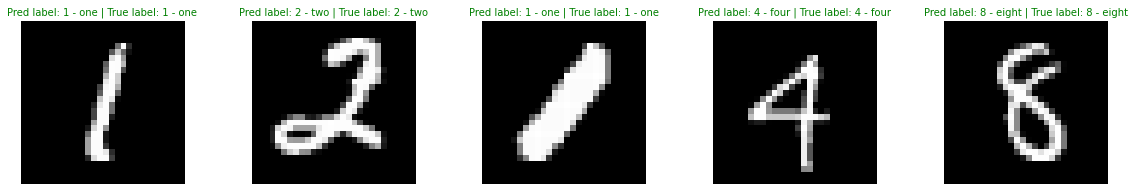

In [63]:
torch.manual_seed(42)

N_SAMPLES = 5

# set up figure
nrows = 1
ncols = 5
plt.figure(figsize=(20, 3))

for i, sample in enumerate(test_samples):
  # add subplot
  plt.subplot(nrows, ncols, i+1)
  # display test sample image
  plt.imshow(sample.squeeze(), cmap='gray')

  # convert class labels to strings
  pred_label_str = test_data.classes[pred_classes[i]]
  true_label_str = test_data.classes[test_labels[i]]

  subplot_title = f"Pred label: {pred_label_str} | True label: {true_label_str}"

  if pred_label_str == true_label_str:
    plt.title(subplot_title, fontsize=10, c='g')
  else:
    plt.title(subplot_title, fontsize=10, c='r')
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [64]:
# create predictions using the entire test data using model 2
predictions = [] # store predictions

model2.eval()
with torch.inference_mode():
  for X, y in test_loader:
    # allocate to device
    X, y = X.to(device), y.to(device)
    # calculate logits
    y_logits = model2(X)
    # calculate int labels
    y_labels = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

    predictions.append(y_labels.cpu())
    
# create tensor using list of predictions
y_predictions = torch.cat(predictions)

In [65]:
# import torchmetrics and mlxtend
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  # check version is 19 or higher
  assert int(mlxtend.__version__.split('.')[1]) >= 19
except:
  !pip install torchmetrics -U mlxtend # rutime restart required
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.14.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mlxtend version: 0.14.0


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbab7bd5fd0>)

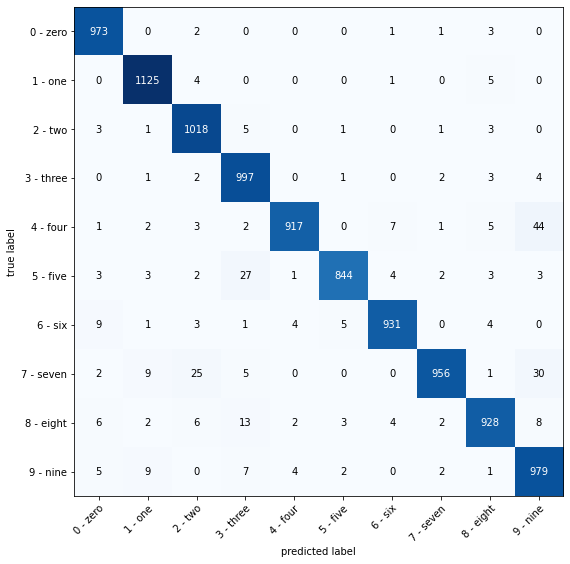

In [66]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# set up confusion matrix
confusion_matrix = ConfusionMatrix(num_classes=len(test_data.classes), task='multiclass')

# create confusion matrix tensor
confusion_matrix_tensor = confusion_matrix(preds=y_predictions, target=test_data.targets)

# plot confusion matrix
plot_confusion_matrix(confusion_matrix_tensor.numpy(), class_names=test_data.classes, figsize=(9,9))

The confusionmatrix shows the model has good performance and generalizes well to the unseen test data.

The high numbers in the diagonal of the matrix show that the model correctly predicts the true label for the majority of images.

The model could be improved, as it still struggles to differentiate between 4s and 9s, 5s and 3s as well as 7s and 9s.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [67]:
import torch

X = torch.randn(1, 3, 64, 64)
print(f"Original shape: {X.shape}")

# convolution layers using increasing sized kernels
conv_kernel_3 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
conv_kernel_5 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=5, stride=1, padding=1)
conv_kernel_7 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=7, stride=1, padding=1)

print(f"3x3 kernel output shape: {conv_kernel_3(X).shape}")
print(f"5x5 kernel output shape: {conv_kernel_5(X).shape}")
print(f"7x7 kernel output shape: {conv_kernel_7(X).shape}")

Original shape: torch.Size([1, 3, 64, 64])
3x3 kernel output shape: torch.Size([1, 3, 64, 64])
5x5 kernel output shape: torch.Size([1, 3, 62, 62])
7x7 kernel output shape: torch.Size([1, 3, 60, 60])


As the kernel size increases, the output of the convolution becomes smaller. As the kernel size decreasess

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [68]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

# download the fashion MNIST training and test data
train_data = FashionMNIST(root='data', download=True, train=True, transform=ToTensor(), target_transform=None)
test_data = FashionMNIST(root='data', download=True, train=False, transform=ToTensor(), target_transform=None)

In [69]:
from torch.utils.data import DataLoader

# load the datasets into data loaders and separate into batches
BATCH_SIZE=32
train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=test_data, shuffle=False, batch_size=BATCH_SIZE)

In [70]:
# train the model and store the results of the loss and accuracy at each epoch
model2_results = train(model2, train_loader, test_loader, loss_fn, optimizer, device)

Epoch: 1 | Train Loss: 0.74933 | Train Acc: 0.74% | Test Loss: 0.55896 | Test Acc: 0.81%
Epoch: 2 | Train Loss: 0.50099 | Train Acc: 0.82% | Test Loss: 0.48834 | Test Acc: 0.83%
Epoch: 3 | Train Loss: 0.44891 | Train Acc: 0.84% | Test Loss: 0.46529 | Test Acc: 0.84%
Epoch: 4 | Train Loss: 0.41779 | Train Acc: 0.85% | Test Loss: 0.42712 | Test Acc: 0.85%
Epoch: 5 | Train Loss: 0.39683 | Train Acc: 0.86% | Test Loss: 0.40703 | Test Acc: 0.86%


In [71]:
import random

test_samples = []
test_labels = []
N_SAMPLES = 50

# create a list of 50 random samples and their labels from the test data
for sample, label in random.sample(list(test_data), k=N_SAMPLES):
  test_samples.append(sample)
  test_labels.append(label)

In [72]:
# calculate logits
pred_probabilities = make_predictions(model2, test_samples, device)

In [73]:
# calculate predicted labels
pred_labels = torch.argmax(pred_probabilities, dim=1) # softmax included in make_predictions()
print(pred_labels) 

tensor([4, 4, 6, 9, 7, 8, 6, 3, 1, 1, 5, 5, 7, 0, 0, 3, 8, 5, 0, 8, 1, 8, 4, 6,
        2, 4, 9, 4, 3, 2, 7, 8, 7, 3, 1, 4, 6, 2, 5, 3, 4, 2, 6, 0, 1, 6, 4, 1,
        6, 8])


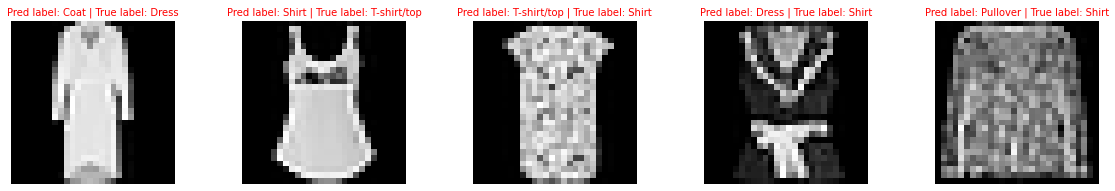

In [74]:
# set up plot
nrows = 1
ncols = 5
plt.figure(figsize=(20, 3))
# subplot index counter
counter = 1

# display the first 5 samples that were incorrectly classified
for i, sample in enumerate(test_samples):
  pred_label_str = test_data.classes[pred_labels[i].item()]
  true_label_str = test_data.classes[test_labels[i]]

  # display 5 images and their predicted label if it was incorrectly classified
  if (pred_label_str != true_label_str) and counter <= 5:
    plt.subplot(nrows, ncols, counter)
    plt.imshow(sample.squeeze(), cmap='gray')
    subplot_title = f"Pred label: {pred_label_str} | True label: {true_label_str}"

    plt.title(subplot_title, fontsize=10, c='r')
    plt.axis(False)
    counter += 1

The incorrect classification by the model indicates an error within the data rather than by the model.

The model has a higher accuracy on both the training and test dataset and struggles on fashion items that are very similar (e.g. pullovers and shirts)

The performance of the model could therefore be improved by increasing the size of the dataset or increasing the variety of sample images with these labels so the model could better distinquish between them.